# 讯飞算法赛--脑部PET/MR图像疾病预测挑战赛（PaddleClas实现版本）

比赛传送门: [讯飞算法赛--脑部PET/MR图像疾病预测挑战赛](https://challenge.xfyun.cn/topic/info?type=pet-mr)

- 注册账号要实名，才能报名

- 每天只能提交3次

- 基线分数:0.8078

> 本项目基线依托于[PaddleClas](https://github.com/PaddlePaddle/PaddleClas)实现搭建，欢迎大家前往Star


# 一、赛事背景
脑PET(Positron Emission Tomography )全称为脑部正电子发射计算机断层显像，是反映脑部病变的基因、分子、代谢及功能状态的显像。脑PET是利用正电子核素标记葡萄糖等脑部代谢物作为显像剂，通过病灶对显像剂的摄取来反映其代谢变化，从而为临床提供疾病的生物脑部代谢信息。脑MRI(Magnetic Resonance Imaging )全称为脑部磁共振显像，是反映脑部病变组织结构的显像。脑PET则是根据有磁距的原子核在磁场作用下，能产生能级间的跃迁的原理从而为临床提供疾病的生物脑部结构信息。现代医学临床实践表明兼容PET与MRI图像的共同诊断可极大的提高确诊精度，从而为脑癫痫病、脑肿瘤、帕金森病、阿尔茨海默综合症等患病初期不明显的脑疾病提供了有效的早期检测手段。从而延缓发病，对后续患者康复治疗有着积极的意义。

# 二、赛事任务
为研究基于脑PET和脑MRI图像的疾病预测，本次大赛提供了脑PET和脑MRI图像数据集训练样本，记录了老年人受试志愿者的脑PET和脑MRI影像资料，其中50%是被确诊为轻度认知障碍（MCI）的脑影像数据，25%是阿尔茨海默综合症（AD）患者的脑影像数据，25%健康人（NC）的脑影像数据。

被试按医学诊断分为三类：

N C：健康

MCI：轻度认知障碍

A D：阿尔茨海默综合症

参赛者需根据提供的样本构建模型，对阿尔茨海默综合症进行分析和预测。

# 三、数据说明

表1.初赛数据集

![](https://ai-studio-static-online.cdn.bcebos.com/ab3ad8066dc048d59141d618c94c2992ac2e62546d5a44cbac6404fd55526f0f)


# 四、1. 初赛数据下载链接

1.[训练与测试数据集(不到100M)](https://ai-contest-static.xfyun.cn/2021/scEBCYVpBQlOC6Nj/%E5%AE%89%E5%BE%BD%E5%A4%A7%E5%AD%A6-%E8%84%91%E9%83%A8PETMR%E5%9B%BE%E5%83%8F%E7%96%BE%E7%97%85%E9%A2%84%E6%B5%8B%E6%8C%91%E6%88%98%E8%B5%9B.zip)

2.[提交示例文件](https://ai-contest-static.xfyun.cn/2021/a679cb33-6a7a-4f64-9014-6624b8c9e66d/%E5%AE%89%E5%BE%BD%E5%A4%A7%E5%AD%A6-%E8%84%91%E9%83%A8PETMR%E5%9B%BE%E5%83%8F%E7%96%BE%E7%97%85%E9%A2%84%E6%B5%8B%E6%8C%91%E6%88%98%E8%B5%9B/submit_sample.csv)

> 建议下载后上传数据集，该数据集不支持公开，个人比赛使用即可

# 四、2. 样本图像分析

> 由于这里的数据是四通道的，但是其实际有效数据为前三个通道的数据，因此，只取前三个通道的数据分析即可

> <font color='red'>解压数据后，可尝试自行调整其它样本的图形分析</font>

## 2.1 样本形态分析

> 两种样本初步观察结果，形态存在一定的差异

> <font color='red'>AD</font> 与 <font color='red'>NC</font> 差异也较大

> AD中普遍空区域较大，NC中较为紧凑

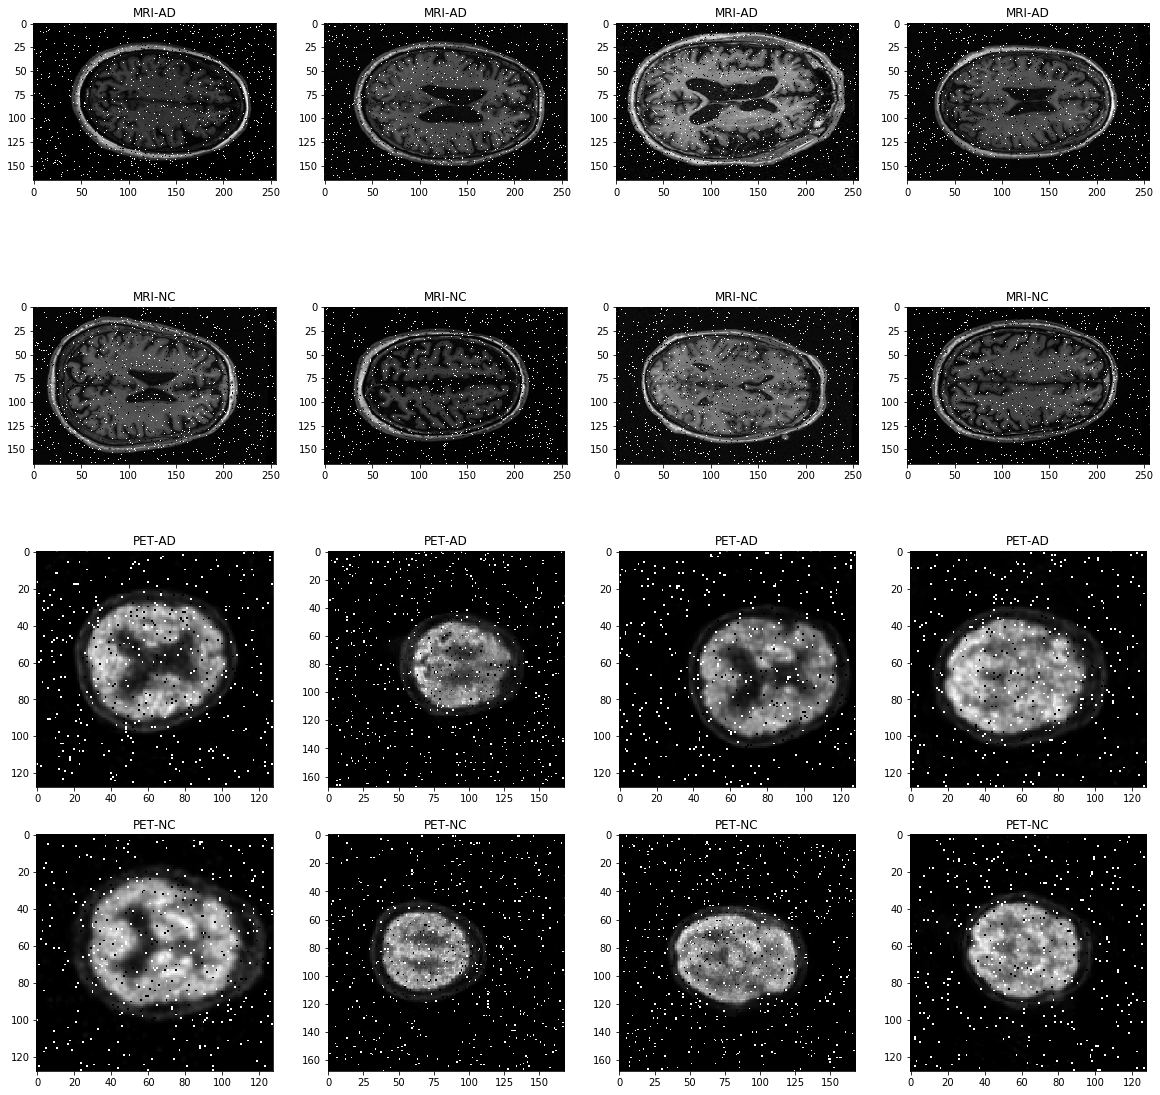

In [6]:
import cv2
import numpy as np

import os
import random
random.seed(2021)
from matplotlib import pyplot as plt

img_MRI_AD_root = '/home/aistudio/PaddleClas/dataset/train/MRI/AD'
img_MRI_NC_root = '/home/aistudio/PaddleClas/dataset/train/MRI/NC'
img_PET_AD_root = '/home/aistudio/PaddleClas/dataset/train/PET/AD'
img_PET_NC_root = '/home/aistudio/PaddleClas/dataset/train/PET/NC'

img_roots = [img_MRI_AD_root, img_MRI_NC_root, img_PET_AD_root, img_PET_NC_root]

# NC：健康
# AD：阿尔茨海默综合症
cls_names = ['AD', 'NC']

show_imgs  = []
show_names = []
show_cls   = []

# 每个类别每个情况随机取4张图片分析
for root in img_roots:
    for _, _, files in os.walk(root):
        random.shuffle(files)
        samples = files[:4]    # 取前4张显示
        for f in samples:
            img_name = f
            img_cls  = root.split('/')[-1]

            img_path = os.path.join(root, img_name)

            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR).astype(np.uint8)

            show_imgs.append(img)
            show_names.append(img_name)
            show_cls.append(root.split('/')[-2] + '-' + img_cls)

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i, j].imshow(show_imgs[i*4 + j])
        axs[i, j].set_title(show_cls[i*4 + j])

## 2.2 Canny边缘检测分析

> 通过边缘检测分析可以看出，这两个数据集 <font color='red'>MRI</font> 与 <font color='red'>PET</font> 是不相同的




| 类型 | 边缘检测类型 | 结果分析 |
| :--------: | :--------: | :--------: |
| MRI     | Canny     | 有明显的外围边界，且内部较为相似     |
| PET     | Canny     | 各样本的外围边界不太相似，且内部差异性较大     |



> 但提交时的val数据是同一个样本，因此可能对于模型的泛化能力有一定的要求

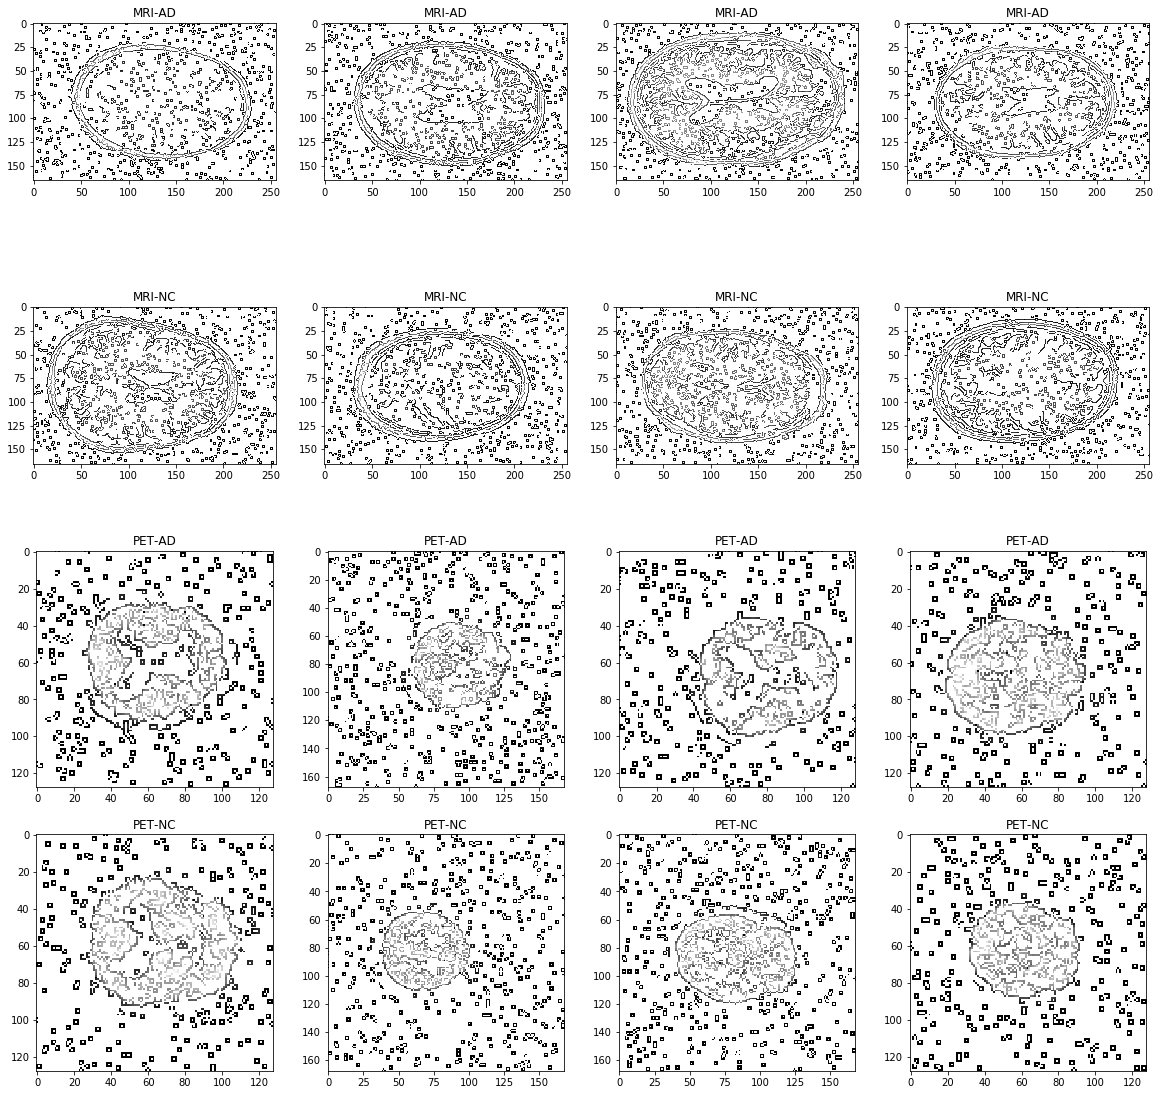

In [67]:
import cv2
import numpy as np

import os
import random
random.seed(2021)
from matplotlib import pyplot as plt

img_MRI_AD_root = '/home/aistudio/PaddleClas/dataset/train/MRI/AD'
img_MRI_NC_root = '/home/aistudio/PaddleClas/dataset/train/MRI/NC'
img_PET_AD_root = '/home/aistudio/PaddleClas/dataset/train/PET/AD'
img_PET_NC_root = '/home/aistudio/PaddleClas/dataset/train/PET/NC'

img_roots = [img_MRI_AD_root, img_MRI_NC_root, img_PET_AD_root, img_PET_NC_root]

# NC：健康
# AD：阿尔茨海默综合症
cls_names = ['AD', 'NC']

show_imgs  = []
show_names = []
show_cls   = []

# 每个类别每个情况随机取4张图片分析
for root in img_roots:
    for _, _, files in os.walk(root):
        random.shuffle(files)
        samples = files[:4]    # 取前4张显示
        for f in samples:
            img_name = f
            img_cls  = root.split('/')[-1]

            img_path = os.path.join(root, img_name)

            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.uint8)
        
            sobelx = cv2.Canny(img, 150, 255)
            
            img = np.concatenate([img, sobelx.reshape(sobelx.shape[0], sobelx.shape[1], 1)], axis=-1)

            # show_imgs.append(img)
            show_imgs.append(img)
            show_names.append(img_name)
            show_cls.append(root.split('/')[-2] + '-' + img_cls)

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i, j].imshow(show_imgs[i*4 + j])
        axs[i, j].set_title(show_cls[i*4 + j])

> 赛题中有说明，样本中各类别是均匀分布的

# 五、配置比赛环境

- [PaddleClas](https://github.com/PaddlePaddle/PaddleClas)套件，辅助快速实现比赛.欢迎Star-Fork

- 本赛题类别仅两类

- HRNet_W64_C模型，实现了**0.8078**的成绩

## 1.解压PaddleClas套件

已经自带，无需再解压，可放心使用

> 如果多次(>=2次)执行该代码块，不会造成无法运行的结果，只是会在PaddleClas目录下多一个`PaddleClas-release-2.1`文件夹

In [ ]:
# !unzip -o data/data90342/PaddleClas-release-2.1.zip
# !mv PaddleClas-release-2.1 PaddleClas

## 2.解压数据集

如果项目未自带数据集，请自行下载一下数据集~

请自行上传下载好的比赛数据集，只需要修改一下cell中的代码即可整个项目自动无误的运行

> 将data目录下的**data98269**换成当前上传后数据集的目录即可

> !unzip -o data/data98269/安徽大学-脑部PETMR图像疾病预测挑战赛.zip -d PaddleClas/dataset/

最终，数据集会存放在`PaddleClas/dataset/brain`文件夹下

In [1]:
!unzip -o data/data98269/安徽大学-脑部PETMR图像疾病预测挑战赛.zip -d PaddleClas/dataset/
!mv PaddleClas/dataset/安徽大学-脑部PETMR图像疾病预测挑战赛 PaddleClas/dataset/brain

## 3.执行数据集的划分

> 直接运行即可，无需修改

> 也可修改该文件中的`split_rate`实现**训练-验证**数据的划分比例修改

- `split_data.py` 会根据`PaddleClas/dataset/agriculture`下的**csv**自动划分数据

- 划分的数据存放在train_list.txt、val_list.txt文件中

> 本划分提供全量数据的划分，会自行创建一个`all_list.txt`文件，包含`train_list.txt`和`val_list.txt`中的所有样本

- 每个文件中的一行样本，都是由当前目录下数据的 `相对路径 + 空格 + 标签` 组成

In [ ]:
%cd /home/aistudio/
!python split_data.py

# 可通过以下方法，测试数据集训练/测试的均值方差分布
# !python get_img_mean_and_std.py

## 4.模型配置文件yml的使用说明

- 以HRNet_W64_C为例

|步骤|路径|操作描述|
| -------- | -------- | -------- |
| 1 | 进入PaddleClas目录| 进入套件 |
| 2 | 进入PaddleClas/configs目录| 进入模型配置文件夹 |
| 3 | 进入PaddleClas/configs/HRNet目录| 进入HRNet模型配置ymls |
| 4 | 在PaddleClas/configs/HRNet目录下| 选中需要的HRNet_W64_C模型配置yml，进入修改模型配置 |
| 5 | 在PaddleClas/configs/HRNet目录下| 保存模型配置修改 |
| 6 | 退回PaddleClas目录| 寻找tools文件夹 |
| 7 | 进入PaddleClas/tools目录| 找到train.py |
| 8 | 在notebook中执行train.py， 并将我们配置好的模型路径传入该py文件中执行| 执行train.py，开始模型训练 |
| 9 | 训练完成后，进入PaddleClas/tools/infer目录| 找到infer.py |
| 10 | 在notebook中执行infer.py | 得到预测结果，然后后处理提交预测结果作为比赛结果(具体预测处理在预测阶段说明) |


> 本项目就按照HRNet_W64_C模型的配置，以及使用进行简单说明，使用其它的模型只需要做相应修改即可

### 4.1 在模型配置yml中的修改

```
mode: 'train'
ARCHITECTURE:
    name: 'HRNet_W64_C'

pretrained_model: ""
model_save_dir: "./output/"
# 分类数目要对应比赛中的分类数
classes_num: 2
# 参与训练的图片数量 -- 训练加验证的总数：这里就是3000
total_images: 3000
# 保存的频率，即25轮保存一次模型
# 且同时会保存当前最优的模型
save_interval: 20
# 边训练边验证
validate: True
# 验证的频率，即25轮验证一次训练的模型
valid_interval: 20
# 总的训练轮次
epochs: 301
# top数，即预测的前几个类别的平均精度
# topk >= classes_num
topk: 2
# 输入图片大小
# 如果要修改，建议同下边的数据加载的预处理图片大小一起修改
image_shape: [3, 224, 224]

use_mix: False
ls_epsilon: -1

# 学习率策略的配置
# 支持——余弦+预热，余弦，多项式衰减，指数预热
# 详细可前往——PaddleClas/ppcls/optimizer/learning_rate.py查看
# 相关替换，可以比对着类初始化参数配置
# 也可以参考下其它模型配置文件的组合方式
LEARNING_RATE:
	  # 多项式衰减
    function: 'Piecewise'          
    params: 
    		# 初始学习率
        lr: 0.1     
        # 衰减步长，30轮次时衰减一次
        decay_epochs: [30, 180, 260] 
        gamma: 0.1 

# 模型优化的配置
# 支持Momentum ， RMSProp
# 详细可前往——PaddleClas/ppcls/optimizer/optimizer.py查看
# 相关替换，可以比对着类初始化参数配置
# 也可以参考下其它模型配置文件的组合方式
OPTIMIZER:
    # 优化方法
    function: 'Momentum'
    params:
        momentum: 0.9
    regularizer:
        # 正则化--L2正则，也支持L1正则
        function: 'L2'
        factor: 0.00010

# 数据集配置
# 训练集配置 -- 很简单，一学就会，立马能用
TRAIN:
	 # 在原配置基础上，适当调整下batch_size
    batch_size: 64
    # notebook中，记得置零多线程，否则数据读取器会报错
    # 也可以自己修改成dist系列的读取器，不过没太大必要，这里就不多说了
    num_workers: 0
    # 训练数据集的样本索引txt -- 就是之前数据划分生成的训练文件
    # 这里时相对路径哦 -- 在PaddleClas下的相对路径
    file_list: "./dataset/train/train_list.txt"
    # 之前有说道，txt中存放的路径是相对路径
    # 因此，这里需要把图片的完整路径补上，这样数据才能读取成功
    # 假设train_list中的样本1： train_143.jpg 0
    # 拼接后，./dataset/train/train_143.jpg
    # 这样就能保证数据的读取了
    data_dir: "./dataset/train/"
    shuffle_seed: 0
    transforms:
    	  # 编码图片数据，通过numpy读取文件中的uint8数据
        # 然后用opencv解码出图片数据
        - DecodeImage:
        		# 转成RGB格式
            to_rgb: True
            # 通道不提前，保持数据格式[W,H,C]
            channel_first: False
        # 随机裁剪
        - RandCropImage:
        	  # 裁剪大小
            size: 224
        # 随机翻转
        - RandFlipImage:
            # 翻转的模式
            flip_code: 1
        # 归一化，可根据数据本身的分布进行修改，也可以不做修改
        - NormalizeImage:
            scale: 1./255.
            # 由于比赛数据集中的像素分布，前三个通道的图像数据中，每个像素点，不同通道的像素值相同
            # 因此，将测试数据集(测试图片为单通道的PNG)的均值方差分布作为训练验证的分布
            mean: [0.120, 0.120, 0.120]
            std: [0.191, 0.191, 0.191]
            order: ''
        # 通道提前
        - ToCHWImage:
    
 
# 验证数据集的配置与训练数据集的配置类似
VALID:
    batch_size: 64
    num_workers: 0
    # 替换成验证集划分的索引数据txt就好了
    file_list: "./dataset/train/val_list.txt"
    # 对应的路径，如果存放路径相同就直接copy训练集的完整目录配置就好
    data_dir: "./dataset/train/"
    shuffle_seed: 0
    transforms:
        - DecodeImage:
            to_rgb: True
            channel_first: False
        - ResizeImage:
            resize_short: 256
        - CropImage:
            size: 224
        - NormalizeImage:
            scale: 1.0/255.0
            mean: [0.120, 0.120, 0.120]
            std: [0.191, 0.191, 0.191]
            order: ''
        - ToCHWImage:


```

> 完成以上的配置后，该模型文件就完成的基本的参数配置以及数据集的配置了

> 接下来就可以上手**train.py**开始训练了

### 4.2运行train.py开始训练

train的基本使用有两种：

- 1. !python tools/train.py -c 模型配置文件yml的路径

	eg:
    
        按照EfficientNetB0进行训练: !python tools/train.py -c configs/HRNet/HRNet_W64_C.yaml
        
    
- 2. !python tools/train.py -c configs/EfficientNet/EfficientNetB0.yaml -o 通过参数名在线修改模型配置文件中的参数信息
    
   eg:
   
   		1.加载预训练模型(再/续训练) !python tools/train.py -c configs/HRNet/HRNet_W64_C.yaml -o pretrained_model='output/HRNet_W64_C/best_model/ppcls'
        
        2.修改模型分类数 !python tools/train.py -c configs/HRNet/HRNet_W64_C.yaml -o classes_num=2
      
      
> -o 的其它使用就要靠大家去多多探索了

## 5. 训练模型

运行下方`cell`即可开始训练

> 更换其它模型时，请记得修改对应yml文件中的必要参数

> 比如**数据集路径**、**分类数**、**图片总数**、**总轮次**、**保存/验证频率**、以及**学习率**和**topk数**

> 详细可看上面的yml介绍

In [ ]:
%cd PaddleClas
!python tools/train.py -c configs/HRNet/HRNet_W64_C.yaml

## 6. 预测结果

- 预测程序为 `PaddleClas/tools/infer/infer.py`

相关参数如下：

- image_file(可简写 i)：待预测的图片文件路径或者批量预测时的图片文件夹，如 ./test.jpeg 或者 test
- model：模型名称，如 MobileNetV3_large_x1_0  -- 就是yml中name的字符串(通常就等于模型的yml名称)
```
mode: 'train'
ARCHITECTURE:
    name: 'HRNet_W64_C'
    
```
- pretrained_model：模型权重文件路径，如 ./output/MobileNetV3_large_x1_0/best_model/ppcls
- use_gpu : 是否开启GPU训练，默认值：True
- class_num : 类别数，默认为1000，需要根据自己的数据进行修改。
- resize_short: 对输入图像进行等比例缩放，表示最短边的尺寸，默认值：256
- resize: 对resize_short操作后的进行居中裁剪，表示裁剪的尺寸，默认值：224
- pre_label_image : 是否对图像数据进行预标注，默认值：False
- pre_label_out_idr : 预标注图像数据的输出文件夹，当pre_label_image=True时，会在该文件夹下面生成很多个子文件夹，每个文件夹名称为类别id，其中存储模型预测属于该类别的所有图像。

> 注意，`pre_label_image`设置为True，`pre_label_out_idr`才有意义，才会有预测结果的保存

> 测试数据集在`dataset/val`目录下

> 模型输出到`PaddleClas/output`

### 6.1模型预测的修改

- 修改`PaddleClas/tools/infer/infer.py`文件中的**preprocess**函数

	- 具体修改参数为：
    	
        ```
        # 预测的均值
        img_mean = [0.120, 0.120, 0.120]
        # 预测的方差
        img_std = [0.191, 0.191, 0.191]
        ```

- 以上操作是为了保证训练与预测的预处理数据分布一致，否则模型效果差

In [ ]:
%cd PaddleClas
!python tools/infer/infer.py \
--image_file 'dataset/val'\
--model 'HRNet_W64_C'\
--pretrained_model 'output/HRNet_W64_C/best_model/ppcls'\
--pre_label_image True\
--pre_label_out_idr './output'\
--class_num 2

# 六、生成比赛提交结果

- 保存提交**csv**在首目录

In [ ]:
import pandas as pd
import numpy as np
import os

class_num = 2
class_results = []
id2class = {0:'AD', 1:'NC'}

for i in range(class_num):
    find_root = '/home/aistudio/PaddleClas/output'
    find_dir_id = str(i)
    find_dir_path = os.path.join(find_root, find_dir_id)
    for _, _, files in os.walk(find_dir_path):
        files = np.asarray(files)
        files = np.reshape(files, (-1, 1))
        files = np.concatenate([files, np.full_like(files, i)], axis=-1)
        for f in files:
            class_results.append([f[0], id2class[int(f[1])]])


result = []
for i in range(len(class_results)):
    for res in class_results:
        if int(res[0].split('.')[0]) == (i+1):
            result.append([res[0].split('.')[0], res[1]])
            class_results.remove(res)
            break
result = np.asarray(result)

result_df = pd.DataFrame(result)
result_df.columns=['image_id', 'category_id']
result_df.to_csv('/home/aistudio/submit_sample.csv', index=None)
result_df.head()

> 做完以上工作就可以将`submit_sample.csv`提交到对应的比赛了

> 祝大家取得好成绩!

> 有问题欢迎评论区讨论

> 姓名：蔡敬辉

> 学历：大三（在读）

> 爱好：喜欢参加一些大大小小的比赛，不限于计算机视觉——有共同爱好的小伙伴可以关注一下哦~后期会持续更新一些自制的竞赛baseline和一些竞赛经验分享

> 主要方向：目标检测、图像分割与图像识别--在学习NLP, 正在捣鼓FPGA

> 联系方式：qq:3020889729 微信:cjh3020889729

> 学校：西南科技大学